In [7]:
import logging
logging.root.setLevel(logging.INFO)


In [8]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [9]:
from utils.xcs_utils import *

In [10]:
exploration_cycles = 20000
exploitation_cycles = 5000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)
scenario.maze.reset()
scenario.maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ A ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [11]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 1600
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 1
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = 0.000001               # p_I
algorithm.initial_error = 0.000001            # epsilon_I
algorithm.initial_fitness = 0.000001           # F_I
algorithm.wildcard_probability = 0.0

In [12]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=1,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment


In [13]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,30,30,30
100,30,348,1600
200,3,382,1600
300,8,422,1600
400,3,438,1600
...,...,...,...
24500,50,158,1600
24600,50,156,1600
24700,50,159,1600


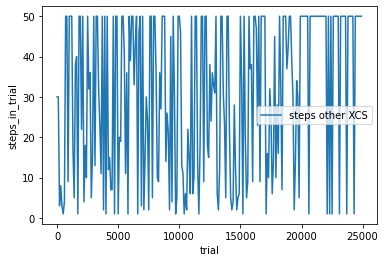

In [14]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

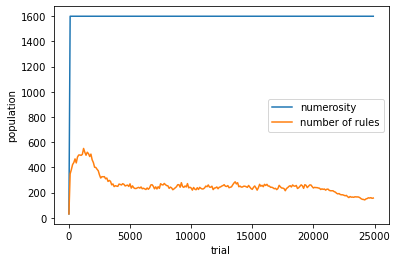

In [15]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [16]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    ga_threshold = 25,
                    metrics_trial_frequency=100,
                    mutation_chance=0.03,
                    chi=1,                           # crossover
                    initial_prediction = 0.000001,               # p_I
                    initial_error = 0.000001,            # epsilon_I
                    initial_fitness = 0.000001,           # F_I
                    user_metrics_collector_fcn=xcs_metrics)

In [17]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=1,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [1.4759209063222626e-08, 4.846474287858624e-09, 1.619556734998562e-08, 6.147684047564758e-09, 1.3894760198141325e-08, 1.3787104108118849e-08, 1.1392464024661418e-08, 6.893492068729571e-09], 'perf_time': 0.026038099999823316, 'population': 104, 'numerosity': 106}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 50, 'reward': [52.757781787769204, 59.26206073793092, 46.483647944870484, 62.11969365097437, 32.32442456939905, 30.426851806717128, 53.06738533082201, 56.599174249048005], 'perf_time': 0.09970829999997477, 'population': 393, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 4000, 'steps_in_trial': 50, 'reward': [79.05348307017464, 68.28482836288927, 57.04573318705564, 63.83733826420575, 65.35153181553939, 75.18826533135794, 54.94328367857139, 78.99561722489135], 'perf_time': 0.12805230000003576, 'population': 403, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 6000, 'steps_in_trial': 50, 'reward': [63.45568581482539, 125.19905413876901, 69.49433214785486, 79.39285453414233, 64.03969721326584, 63.826065519167415, 76.63597092484956, 78.54922880875058], 'perf_time': 0.09008879999987585, 'population': 377, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 8000, 'steps_in_trial': 50, 'reward': [74.94577102344478, 71.5102046953

In [18]:
display(my_metrics)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,50,0.026038,104,106
100,50,0.078368,265,1600
200,21,0.037638,295,1600
300,50,0.101016,325,1600
400,50,0.075415,347,1600
...,...,...,...,...
24500,50,0.044279,380,1600
24600,50,0.045289,380,1600
24700,50,0.048016,380,1600


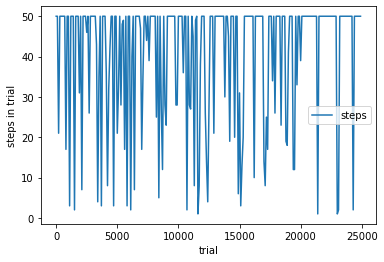

In [19]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


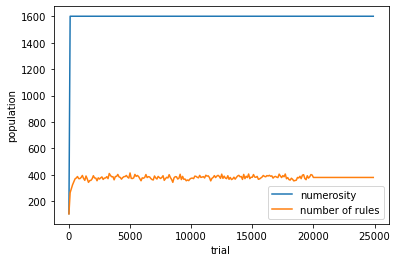

In [20]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

#### Conclusions
None so far.